#Customer propensity to purchase


##Context


You get many visitors to your website every day, but you know only a small percentage of them are likely to buy from you, while most will perhaps not even return.Propensity modeling allows you to allocate your resources more wisely, resulting in greater efficiencies, while achieving better results. To give an example, think of this: instead of sending an email advertisement where there’s a 0%-100% chance of a user clicking it, with propensity modeling, you can target users with a 50%+ chance of clicking it. Fewer emails, more conversions! Right now you may be spending money to re-market to everyone, but perhaps we could use machine learning to identify the most valuable prospects. Having this important information can also help the marketing department know the kind of email to sent to a particular visitor.

##Content


This data set represents a day's worth of visit to a website. Each row represents a unique customer, identified by their unique UserID. The columns represent feature of the users visit (such as the device they were using) and things the user did on the website in that day. These features will be different for every website, but in this data a few of the features we consider are:

**Basketadddetail**: Did the customer add a product to their shopping basket from the product detail page?

**Sign_in**: Did the customer sign in to the website?

**saw_homepage**: Did the customer visit the website's homepage?

**Returning_user**: Is this visitor new, or returning?

**basket_icon_click**
Did the visitor click on the shopping basket icon?

**basket_add_list**
Did the visitor add a product to their shopping cart on the 'list' page?

**basket_add_detail**
Did the visitor add a product to their shopping cart on the 'detail' page?

**sort_by**
Did the visitor sort products on a page?

**image_picker**
Did the visitor use the image picker?

**account_page_click**
Did the visitor visit their account page?

**promo_banner_click**
Did the visitor click on a promo banner?

**detail_wishlist_add**
Did the visitor add a product to their wishlist from the 'detail' page?

**list_size_dropdown**
Did the visitor interact with a product dropdown?

**closed_minibasket_click**
Did the visitor close their mini shopping basket?

**checked_delivery_detail**
Did the visitor view the delivery FAQ area on a product page?

**checked_returns_detail**
Did the visitor check the returns FAQ area on a product page?

**sign_in**
Did the visitor sign in to the website?

**saw_checkout**
Did the visitor view the checkout?

**saw_sizecharts**
Did the visitor view a product size chart?

**saw_delivery**
Did the visitor view the delivery FAQ page?

**saw_account_upgrade**
Did the visitor view the account upgrade page?

**saw_homepage**
Did the visitor view the website homepage?

**device_mobile**
Was the visitor on a mobile device?

**device_desktop**
Was the visitor on a desktop device?

**device_tablet**
Was the visitor on a table device?

**returning_user**
Was the visitor new or returning?

**loc_uk**
Was the visitor located in the UK, based on their IP address?

**ordered**
Did the customer place an order?

In this data set we also have a feature showing whether the customer placed an order (ordered), which is what we predict on(1 means the customer placed an order while 0 means the customer did not).

#Data upload and preview

In [17]:
import pandas as pd


In [18]:
url = '/content/drive/MyDrive/training_sample.csv'

In [19]:
df = pd.read_csv(url)
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1


In [20]:
df.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,0.062874,0.009179,0.088810,0.080085,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,0.242737,0.095365,0.284469,0.271426,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us check for the datatype and if there any null in the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [22]:
df.nunique()

UserID                     455401
basket_icon_click               2
basket_add_list                 2
basket_add_detail               2
sort_by                         2
image_picker                    2
account_page_click              2
promo_banner_click              2
detail_wishlist_add             2
list_size_dropdown              2
closed_minibasket_click         2
checked_delivery_detail         2
checked_returns_detail          2
sign_in                         2
saw_checkout                    2
saw_sizecharts                  2
saw_delivery                    2
saw_account_upgrade             2
saw_homepage                    2
device_mobile                   2
device_computer                 2
device_tablet                   2
returning_user                  2
loc_uk                          2
ordered                         2
dtype: int64

In [23]:
df.loc_uk.unique()

array([1, 0])

In [24]:
import seaborn as sns

Let us check for correlation among input variable and target variable

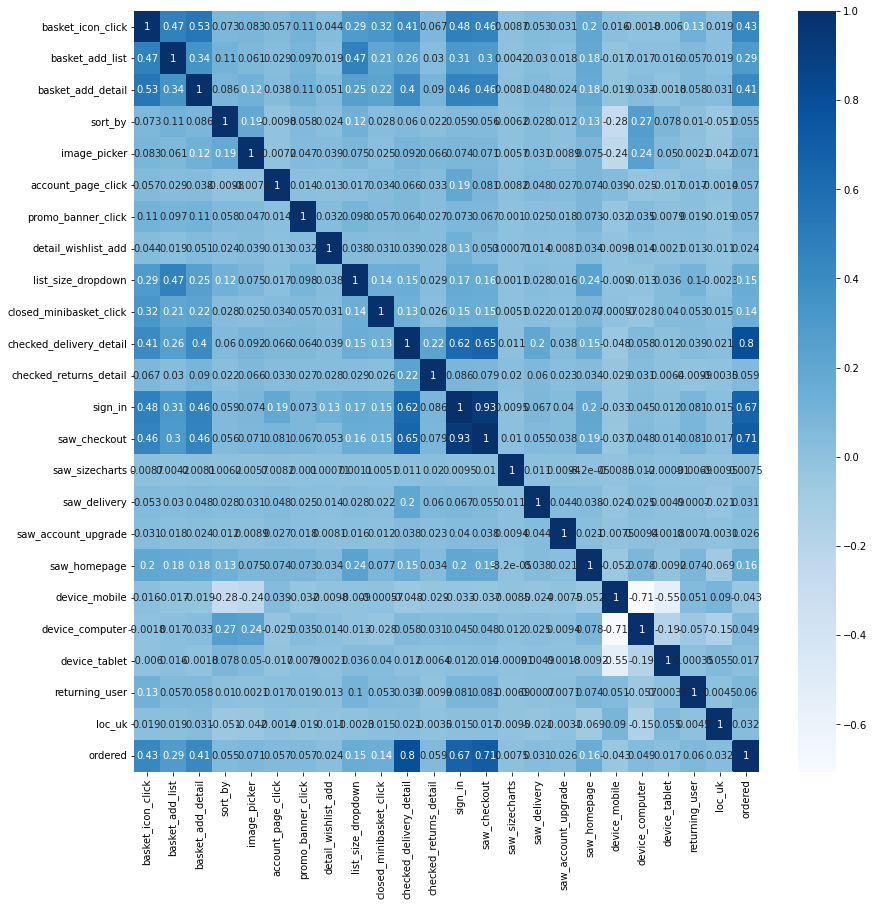

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#Preprocessing

I am removing the user id column because it is not relevant here

In [26]:
df.drop('UserID', axis=1,inplace=True)

Creating input(X) and target(y) column

In [27]:
X=df.drop('ordered',axis=1)
y=df.ordered


let us see the number of order placed

In [28]:
from collections import Counter
import numpy as np


In [29]:
Counter(y)

Counter({0: 436308, 1: 19093})

In [30]:
np.mean(y)*100

4.1925687471042

The result above shows that only about 4 percent of the collected data ordered.Let us balance the imbalance data using imblearn

In [31]:
pip install imbalanced-learn

In [32]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
under = RandomUnderSampler(random_state=42)

In [34]:
X_und, y_und = under.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
Counter(y_und )

Counter({0: 19093, 1: 19093})

In [36]:
col = X.columns.tolist()
col

['basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'account_page_click',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'closed_minibasket_click',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_sizecharts',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk']

Splitting the dataset into train,test and validation

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_und, y_und , test_size=0.2, random_state=1)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

#Model training and selection

I am going to use GridsearchCv to tune model hyperparameters and select the best tuned model.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.model_selection import GridSearchCV

##Logistic regression

In [44]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty =  ['none', 'l1', 'l2', 'elasticnet']
random_state=[1]
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty, C=c_values,random_state = random_state)

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=8, scoring='roc_auc')

In [46]:
from sklearn.metrics import SCORERS

In [47]:
grid_search.fit(X_train_full, y_train_full)

GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'random_state': [1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, retur

In [48]:
grid_search.best_score_

0.9970477748431774

In [49]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l1', 'random_state': 1, 'solver': 'saga'}

In [50]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

##Decision tree classifier

In [51]:
# define models and parameters
model = DecisionTreeClassifier()
criterion=['gini', 'entropy']
max_depth = [1,2,4,6,8,None]
random_state=[1]
min_samples_split = [2,4,6,8,10]
grid = dict(criterion=criterion,max_depth=max_depth, min_samples_split=min_samples_split,random_state = random_state)

In [52]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=8, scoring='roc_auc')

In [53]:
grid_search.fit(X_train_full, y_train_full)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [54]:
grid_search.best_score_

0.9963794154734175

In [55]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 2,
 'random_state': 1}

##Random forest classifier

In [56]:
# define models and parameters
model = RandomForestClassifier()
max_features = ['sqrt', 'log2']
n_estimators = [10, 100, 1000]
random_state=[1]
grid = dict(max_features=max_features,n_estimators=n_estimators,random_state = random_state)

In [57]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=8, scoring='roc_auc')

In [58]:
grid_search.fit(X_train_full, y_train_full)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [59]:
grid_search.best_score_

0.995941685101164

In [60]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000, 'random_state': 1}

##Xgboost

In [61]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [62]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [63]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)


In [64]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [65]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.996029	val-auc:0.995403
[10]	train-auc:0.997659	val-auc:0.996103
[20]	train-auc:0.998114	val-auc:0.996268
[30]	train-auc:0.998258	val-auc:0.995882
[40]	train-auc:0.998369	val-auc:0.995648
[50]	train-auc:0.998512	val-auc:0.99523
[60]	train-auc:0.998627	val-auc:0.995239
[70]	train-auc:0.998656	val-auc:0.99527
[80]	train-auc:0.998708	val-auc:0.995188
[90]	train-auc:0.99876	val-auc:0.995122
[99]	train-auc:0.998785	val-auc:0.99511


##Model selection

The best model from above is linear regression

In [66]:
fi_model= LogisticRegression(C= 1.0, penalty= 'l1', random_state = 1, solver = 'saga')

In [67]:
fi_model.fit(X_train_full, y_train_full)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
test_pred = fi_model.predict(X_test)

In [69]:
accur = confusion_matrix(y_test,test_pred)

In [70]:
accur

array([[3810,   29],
       [  33, 3766]])

In [83]:
def predict(df, model):
    cat = pd.DataFrame([df])
    
    X = cat[col].values

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [84]:
customer = {'UserID':'a0c0-6b73247c-a0c0-4bd9-8baa-797356',
 'basket_icon_click':0,
 'basket_add_list':0,
 'basket_add_detail':1,
 'sort_by':0,
 'image_picker':0,
 'account_page_click':0,
 'promo_banner_click':1,
 'detail_wishlist_add':0,
 'list_size_dropdown':1,
 'closed_minibasket_click':0,
 'checked_delivery_detail':1,
 'checked_returns_detail':0,
 'sign_in':0,
 'saw_checkout':0,
 'saw_sizecharts':0,
 'saw_delivery':0,
 'saw_account_upgrade':0,
 'saw_homepage':0,
 'device_mobile':0,
 'device_computer':0,
 'device_tablet':0,
 'returning_user':1,
 'loc_uk':1}

In [85]:
predict(customer, fi_model)

array([0.01166208])

In [86]:
import pickle

In [87]:
output_file = 'model_logistic.bin'
output_file

'model_logistic.bin'

In [88]:
with open(output_file,'wb') as f_out:
  pickle.dump(fi_model,f_out)

Load the model

In [ ]:
col=['basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'account_page_click',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'closed_minibasket_click',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_sizecharts',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk']

In [89]:
def predict(df, model):
    cat = pd.DataFrame([df])
    
    X = cat[col].values

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [90]:
input_file = 'model_logistic.bin'

In [ ]:
import pickle

In [91]:
with open(input_file,'rb') as f_in:
  model = pickle.load(f_in)

In [92]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)